In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import sklearn
import matplotlib.pyplot as plt
import pickle

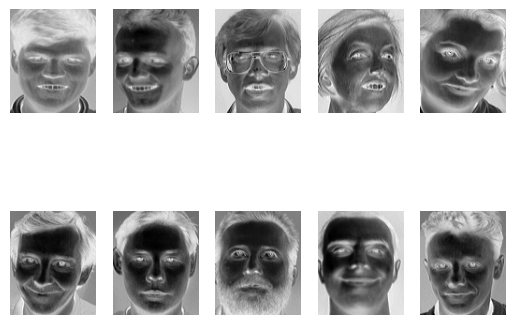

In [2]:
def load_data(dir):
	data = []
	for root, dirs, files in os.walk(dir):
		for file in files:
			if file.endswith('.pgm'):
				filename = os.path.join(root, file)
				img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
				img = 255 - img
				data.append(img)
	return data

images = load_data('att_faces')
test = images[0:10]
images = images[10:]

def show_sample(images, each=10):
	fig, axs = plt.subplots(2, 5)
	for i in range(2):
		for j in range(5):
			axs[i, j].imshow(images[(i * 5 + j)*each], cmap='gray')
			axs[i, j].axis('off')
            
show_sample(images)

H = images[0].shape[0]
W = images[0].shape[1]

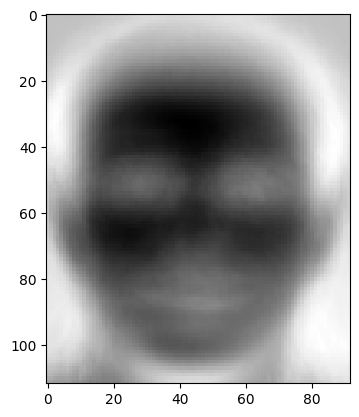

In [3]:
mean_face = np.mean(images, axis=0)
plt.imshow(mean_face, cmap='gray')

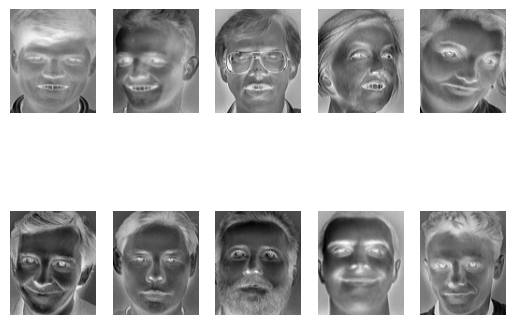

In [4]:
centered_faces = images - mean_face

show_sample(centered_faces)

(100, 10304)
(100, 112, 92)


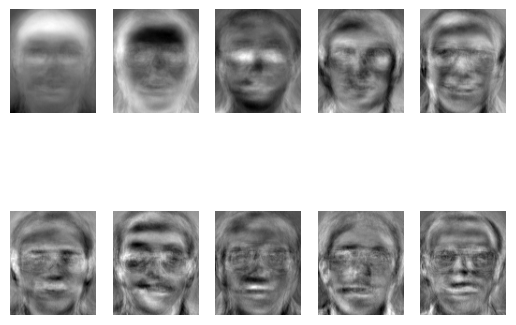

In [5]:
# do PCA from sklearn
from sklearn.decomposition import PCA
n_components = 100
X = centered_faces.reshape(centered_faces.shape[0], -1)
result = PCA(n_components=n_components).fit(X)

print(result.components_.shape)

eigenfaces = result.components_

eigenfaces_2d = eigenfaces.reshape(n_components, H, W)

print(eigenfaces_2d.shape)

show_sample(eigenfaces_2d, 4)

In [6]:
encoded = result.transform(X)
print(encoded.shape)

(390, 100)


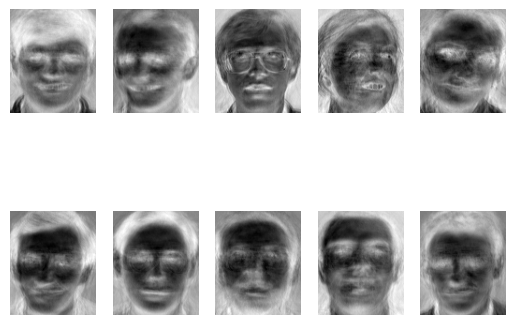

In [7]:
# reconstructed = result.inverse_transform(encoded)
reconstructed = np.dot(encoded, eigenfaces)
reconstructed_faces = reconstructed.reshape(reconstructed.shape[0], H, W)
reconstructed_faces += mean_face
show_sample(reconstructed_faces)

In [8]:
from encoder import FaceEncoder
	

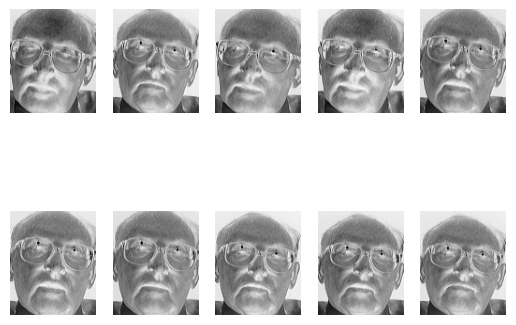

In [9]:
show_sample(test, 1)

Encoder has been pickled and saved to 'encoder.pkl'.


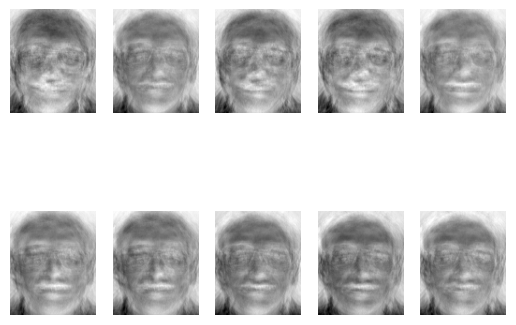

In [10]:
encoder = FaceEncoder(mean_face, eigenfaces)
encoded_test = [encoder.encode(face) for face in test]
decoded_test = [encoder.decode(encoded) for encoded in encoded_test]

show_sample(decoded_test, 1)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print("Encoder has been pickled and saved to 'encoder.pkl'.")
